## 모듈 불러오기

In [76]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## 데이터 가져오기

In [77]:
import pandas_gbq

query1 = 'select * from yfinance.samsung order by Date'
query2 = 'select * from yfinance.sk order by Date'
query3 = 'select * from yfinance.naver order by Date'

samsung_df = pandas_gbq.read_gbq(query1, project_id='finance-420106')
sk_df = pandas_gbq.read_gbq(query2, project_id='finance-420106')
naver_df = pandas_gbq.read_gbq(query3, project_id='finance-420106')

df_list = [samsung_df,sk_df,naver_df]
title = ['Samsung','Sk','Naver']
# Prophet 사용을 위해 'ds' 'y' 컬럼 생성
for df in df_list:
  df['ds'] = pd.to_datetime(df.Date, format = '%Y-%m-%d')
  df['y'] = df['Close']

display(samsung_df.tail(3))
display(sk_df.head(3))
display(naver_df.head(3))

Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|


,Date,Open,High,Low,Close,Adj_Close,Volume,ds,y
1233,2024-04-19,78300.0,78700.0,76300.0,77600.0,77600.0,31317563,2024-04-19,77600.0
1234,2024-04-22,77400.0,77500.0,75100.0,76100.0,76100.0,30469477,2024-04-22,76100.0
1235,2024-04-23,76400.0,76800.0,75500.0,75500.0,75500.0,18056640,2024-04-23,75500.0


,Date,Open,High,Low,Close,Adj_Close,Volume,ds,y
0,2019-04-18,80800.0,81200.0,78500.0,79200.0,74813.023438,3295697,2019-04-18,79200.0
1,2019-04-19,80500.0,82400.0,80100.0,81800.0,77268.984375,3040186,2019-04-19,81800.0
2,2019-04-22,81500.0,81800.0,79900.0,80500.0,76040.992188,1887109,2019-04-22,80500.0


,Date,Open,High,Low,Close,Adj_Close,Volume,ds,y
0,2019-04-18,119000.0,120000.0,117000.0,118000.0,116204.085938,776721,2019-04-18,118000.0
1,2019-04-19,119000.0,119000.0,117500.0,118000.0,116204.078125,247009,2019-04-19,118000.0
2,2019-04-22,118000.0,119500.0,117500.0,118000.0,116204.078125,531346,2019-04-22,118000.0


## 시각화

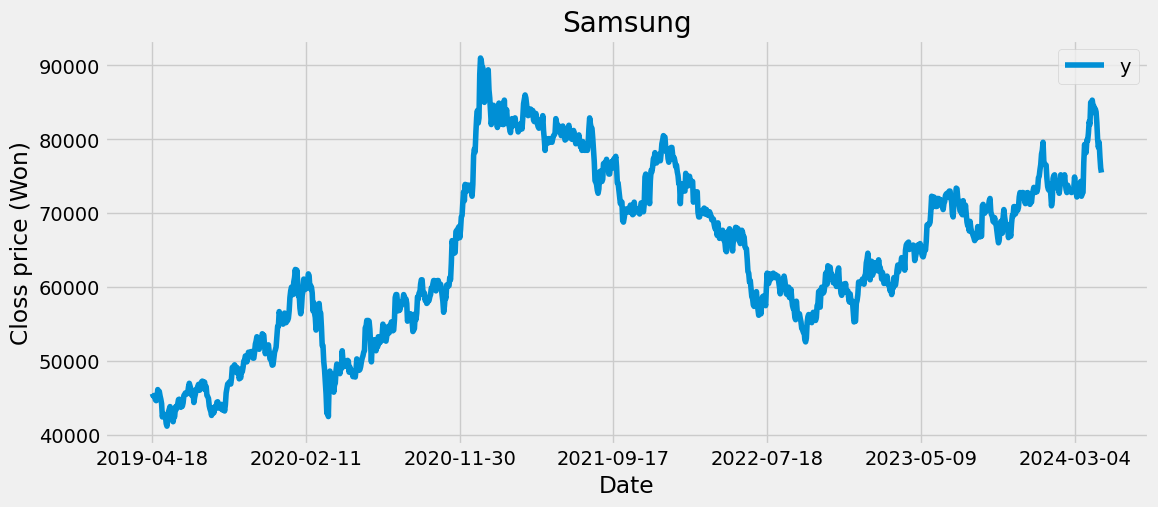

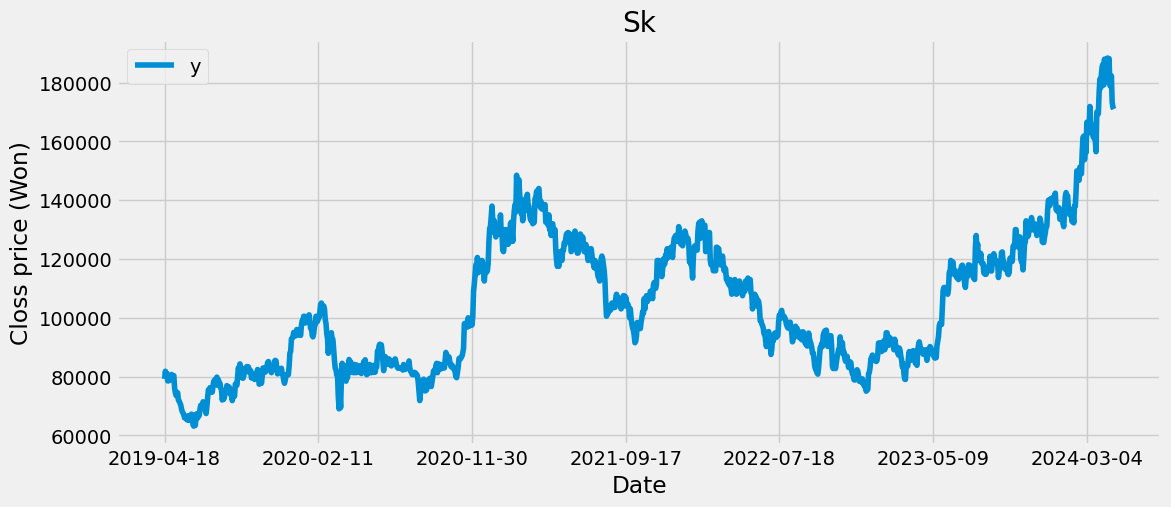

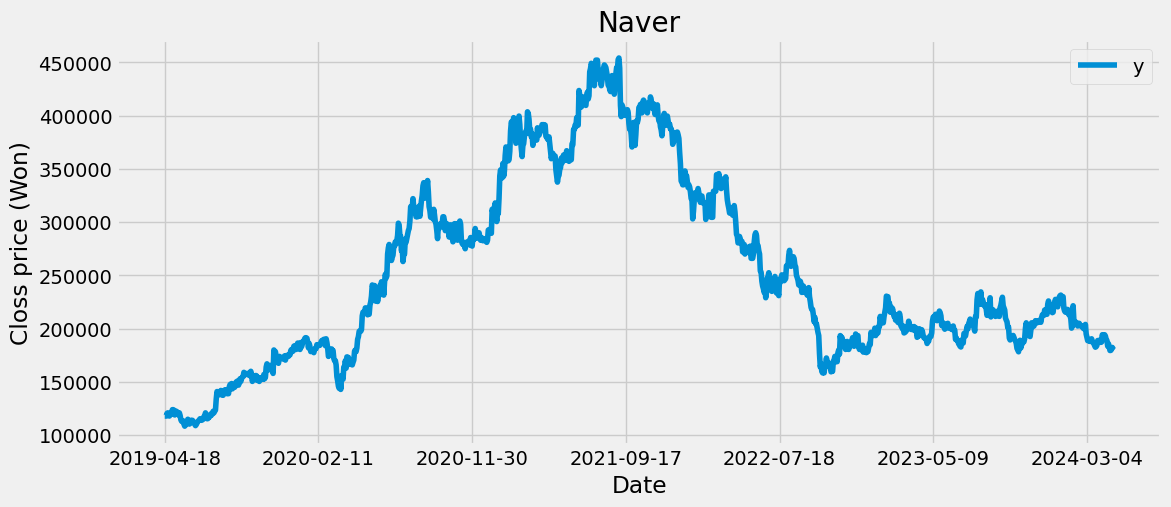

In [78]:
for i,df in enumerate(df_list,0):
  ax = df.plot( x='Date', y='y', title = title[i], figsize =(12,5))
  ax.set_ylabel('Closs price (Won)')
  plt.show()

## 모델적합

In [79]:
model_prophet_samsung = Prophet(changepoint_prior_scale = 0.15, daily_seasonality = True)
model_prophet_sk = Prophet(changepoint_prior_scale = 0.15, daily_seasonality = True)
model_prophet_naver = Prophet(changepoint_prior_scale = 0.15, daily_seasonality = True)
model_prophet_list = [model_prophet_samsung,model_prophet_sk,model_prophet_naver]
for i in range(3):
  model_prophet_list[i].fit(df_list[i])

DEBUG:cmdstanpy:input tempfile: /tmp/tmpdhy5ccdk/0qxy5t4b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdhy5ccdk/1pwar2er.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3718', 'data', 'file=/tmp/tmpdhy5ccdk/0qxy5t4b.json', 'init=/tmp/tmpdhy5ccdk/1pwar2er.json', 'output', 'file=/tmp/tmpdhy5ccdk/prophet_model75pymwf5/prophet_model-20240424221928.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:19:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:19:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdhy5ccdk/uwrsc0ua.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdhy5ccdk/zjcwuw6i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

## 예측 - 향후 1년 time stamp 생성

In [80]:
fcast_time = 365 # 365일 예측

df_forecast_samsung = model_prophet_samsung.make_future_dataframe(periods = fcast_time, freq = 'D')
df_forecast_sk = model_prophet_sk.make_future_dataframe(periods = fcast_time, freq = 'D')
df_forecast_naver = model_prophet_naver.make_future_dataframe(periods = fcast_time, freq = 'D')

display(df_forecast_samsung.tail())
display(df_forecast_sk.tail())
display(df_forecast_naver.tail())

,ds
1596,2025-04-19
1597,2025-04-20
1598,2025-04-21
1599,2025-04-22
1600,2025-04-23


,ds
1596,2025-04-19
1597,2025-04-20
1598,2025-04-21
1599,2025-04-22
1600,2025-04-23


,ds
1596,2025-04-19
1597,2025-04-20
1598,2025-04-21
1599,2025-04-22
1600,2025-04-23


## 예측 - 결과

In [81]:
df_forecast_samsung = model_prophet_samsung.predict(df_forecast_samsung)
display(df_forecast_samsung[['ds','yhat','yhat_lower','yhat_upper']].tail(3))

df_forecast_sk = model_prophet_sk.predict(df_forecast_sk)
display(df_forecast_sk[['ds','yhat','yhat_lower','yhat_upper']].tail(3))

df_forecast_naver = model_prophet_naver.predict(df_forecast_naver)
display(df_forecast_naver[['ds','yhat','yhat_lower','yhat_upper']].tail(3))

display(df_forecast_naver.tail(3))
display(naver_df.tail(3))

,ds,yhat,yhat_lower,yhat_upper
1598,2025-04-21,94206.647906,33845.204205,153174.503005
1599,2025-04-22,94288.419235,31041.395061,153061.831649
1600,2025-04-23,94139.364928,33430.106335,153346.128507


,ds,yhat,yhat_lower,yhat_upper
1598,2025-04-21,263220.385607,99963.158855,428015.785957
1599,2025-04-22,263433.617504,95067.739604,430725.438156
1600,2025-04-23,263216.693827,94069.193143,429541.263558


,ds,yhat,yhat_lower,yhat_upper
1598,2025-04-21,167903.830043,-171019.095279,525905.532775
1599,2025-04-22,167531.002065,-181630.368673,523822.771594
1600,2025-04-23,167108.048941,-182294.268621,535358.233410


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1598,2025-04-21,164611.059436,-171019.095279,525905.532775,-179586.967690,521125.109484,3292.770607,3292.770607,3292.770607,14371.22472,...,478.061809,478.061809,478.061809,-11556.515922,-11556.515922,-11556.515922,0.0,0.0,0.0,167903.830043
1599,2025-04-22,164567.758162,-181630.368673,523822.771594,-181570.467662,522358.689477,2963.243903,2963.243903,2963.243903,14371.22472,...,657.930248,657.930248,657.930248,-12065.911065,-12065.911065,-12065.911065,0.0,0.0,0.0,167531.002065
1600,2025-04-23,164524.456887,-182294.268621,535358.233410,-183553.967635,523572.947068,2583.592054,2583.592054,2583.592054,14371.22472,...,743.381410,743.381410,743.381410,-12531.014076,-12531.014076,-12531.014076,0.0,0.0,0.0,167108.048941


,Date,Open,High,Low,Close,Adj_Close,Volume,ds,y
1233,2024-04-19,179900.0,183800.0,179100.0,182400.0,182400.0,759807,2024-04-19,182400.0
1234,2024-04-22,185200.0,185300.0,180300.0,180900.0,180900.0,492109,2024-04-22,180900.0
1235,2024-04-23,181400.0,182400.0,180000.0,180100.0,180100.0,455545,2024-04-23,180100.0


## 예측 - 시각화

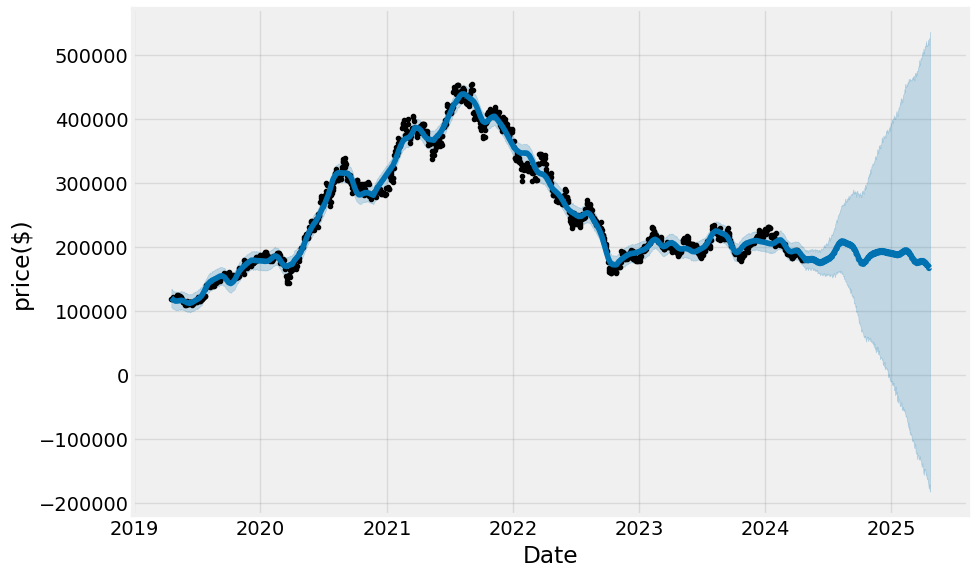

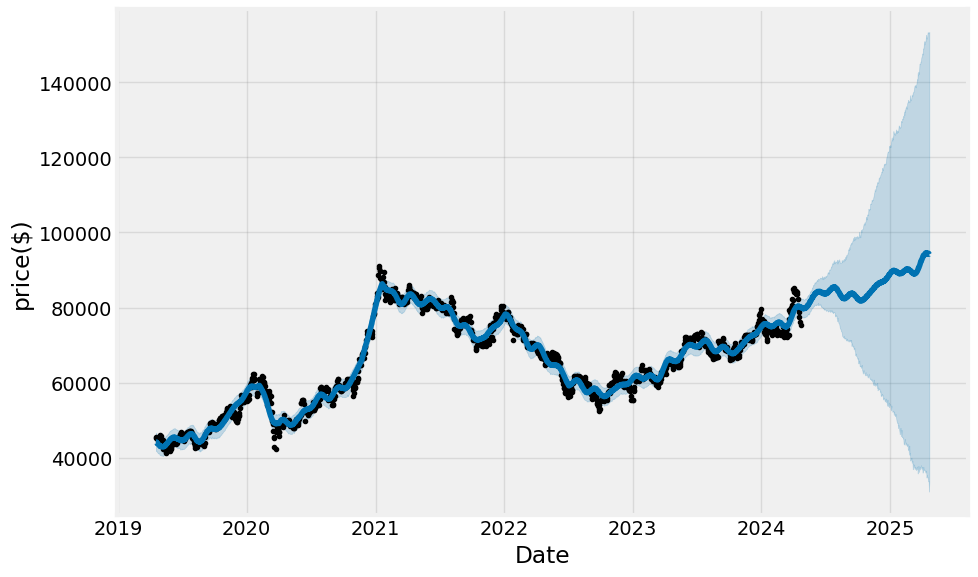

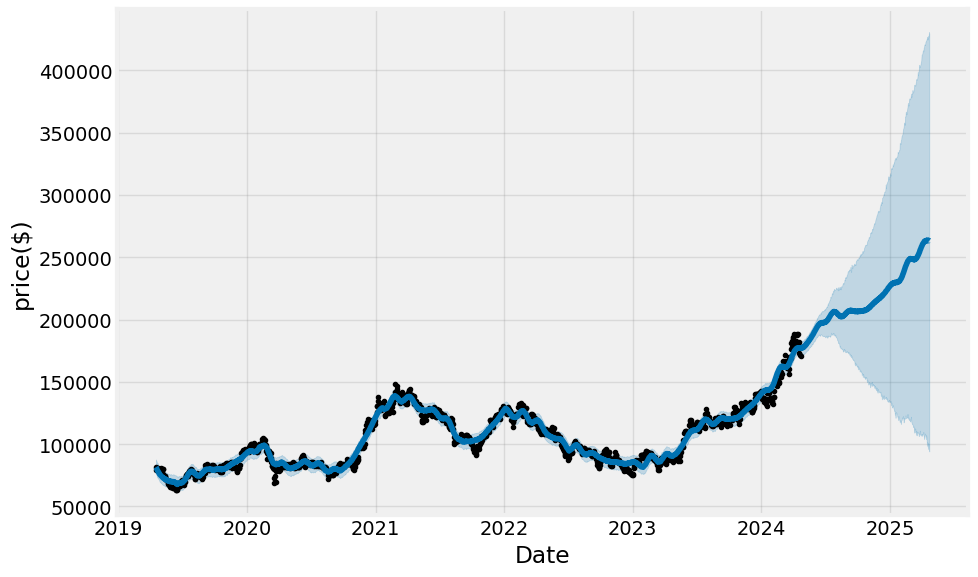

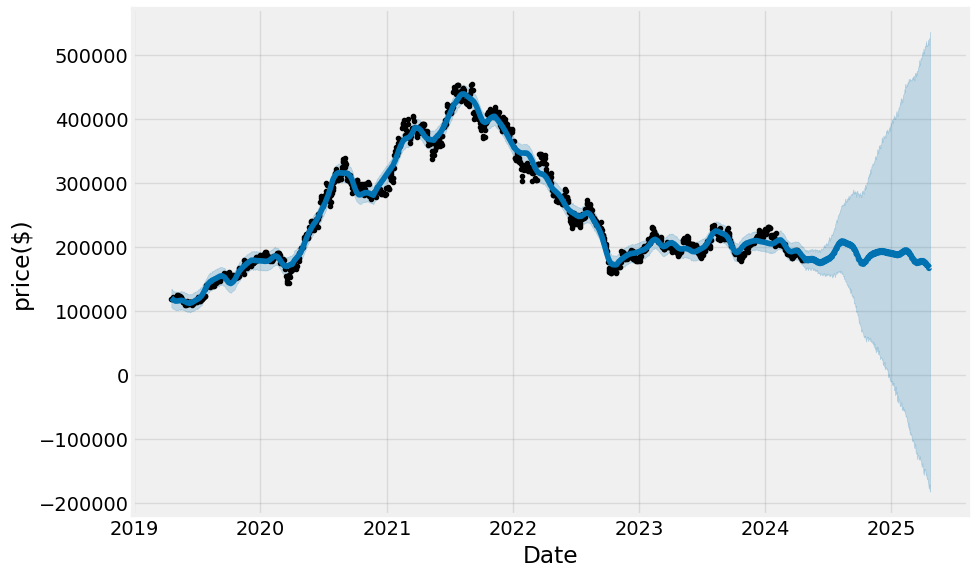

In [82]:
model_prophet_samsung.plot(df_forecast_samsung, xlabel = 'Date',ylabel ='price($)')
model_prophet_sk.plot(df_forecast_sk, xlabel = 'Date',ylabel ='price($)')
model_prophet_naver.plot(df_forecast_naver, xlabel = 'Date',ylabel ='price($)')

## 예측 - 세부 componenet 확인

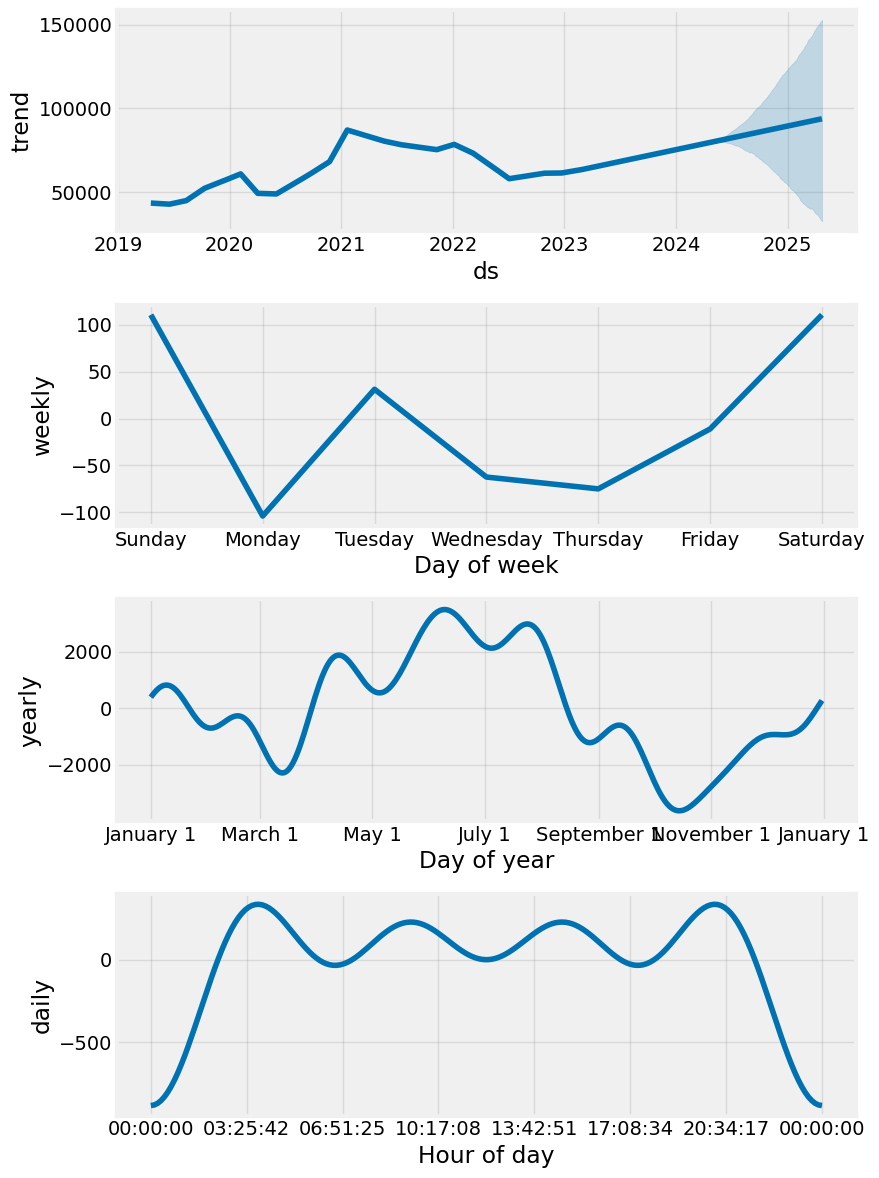

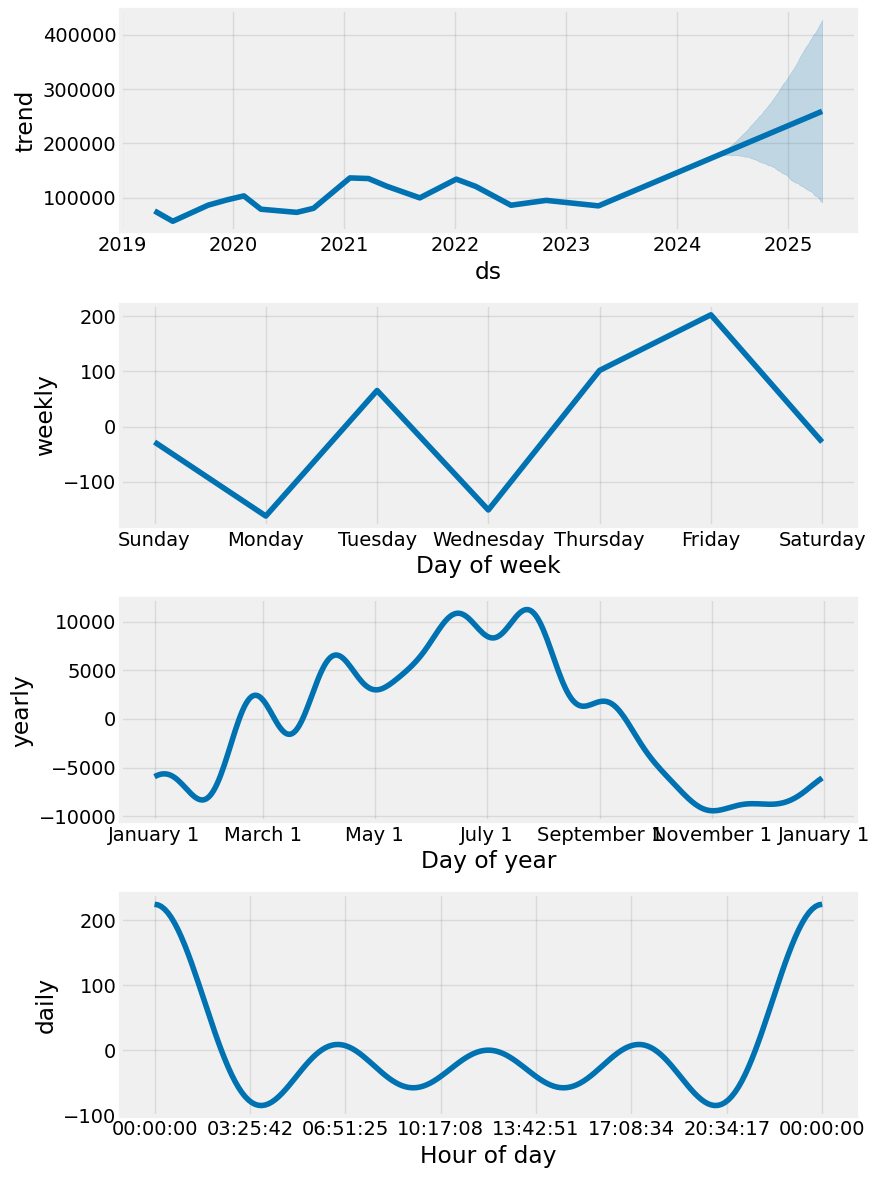

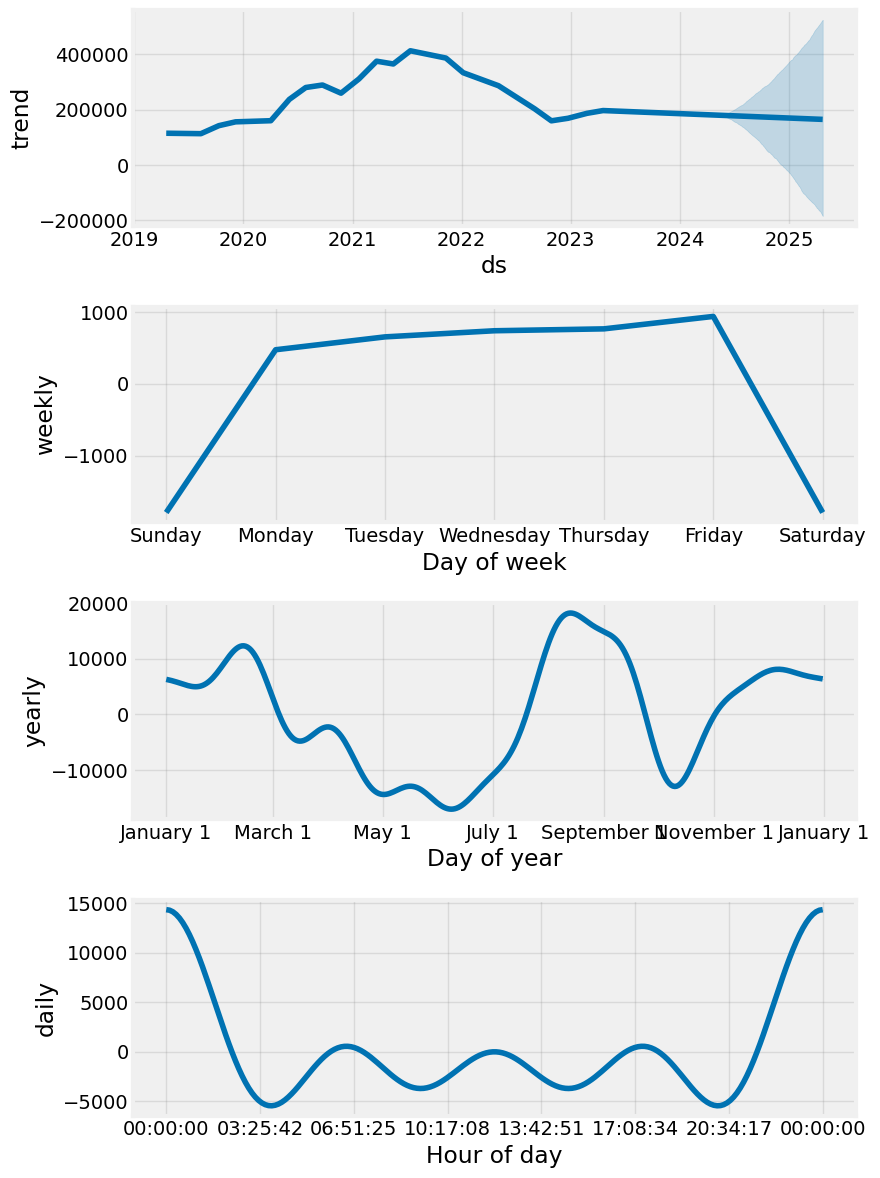

In [83]:
# 세부 componenet 확인
model_prophet_samsung.plot_components(df_forecast_samsung);
model_prophet_sk.plot_components(df_forecast_sk);
model_prophet_naver.plot_components(df_forecast_naver);

## 예측 - DB저장

### 예측 - DB저장 - 예측일자 데이터 필터링

In [84]:
# 예측일자 데이터만 필터링

from datetime import timedelta

# 학습 데이터셋의 'ds' 열에서 최대값(마지막 날짜)을 찾고
last_date = samsung_df['ds'].max()
last_date = pd.to_datetime(last_date)  # datetime 타입으로 변환

# 필터링 시작 날짜: 마지막 날짜 + 1일 >>> 모든 종목 시작 날짜 동일하므로 공통 사용
start_date = last_date + timedelta(days=1)

# 예측일자만 필터링
df_forecast_samsung = df_forecast_samsung[df_forecast_samsung['ds'] >= start_date]
df_forecast_sk = df_forecast_sk[df_forecast_sk['ds'] >= start_date]
df_forecast_naver = df_forecast_naver[df_forecast_naver['ds'] >= start_date]

# 필요한 열만 필터링
df_forecast_samsung = df_forecast_samsung[['ds','yhat','yhat_lower','yhat_upper']]
df_forecast_sk = df_forecast_sk[['ds','yhat','yhat_lower','yhat_upper']]
df_forecast_naver = df_forecast_naver[['ds','yhat','yhat_lower','yhat_upper']]
# ds열을 Date로 변경
df_forecast_samsung = df_forecast_samsung.rename(columns={'ds': 'Date'})
df_forecast_sk = df_forecast_sk.rename(columns={'ds': 'Date'})
df_forecast_naver = df_forecast_naver.rename(columns={'ds': 'Date'})

### 예측 - DB저장 - 로컬저장

In [85]:
# csv 파일로 로컬에 저장
df_forecast_samsung.to_csv('/content/drive/MyDrive/Colab Notebooks/DAstudy/dataset/samsung_forecast.csv', index=False)
df_forecast_sk.to_csv('/content/drive/MyDrive/Colab Notebooks/DAstudy/dataset/sk_forecast.csv', index=False)
df_forecast_naver.to_csv('/content/drive/MyDrive/Colab Notebooks/DAstudy/dataset/naver_forecast.csv', index=False)

### 예측 - DB저장 - gbq 저장

In [86]:
# gbq로 저장
# 주의할 점 : column명이 숫자, 한글 시작이면 안된다. 띄어쓰기가 되어있는 경우도 제대로 업데이트가 안된다.
# if_exists 종류 : replace(덮어쓰기), append(합치기), fail(에러)

df_forecast_samsung.to_gbq(destination_table='forecast.samsung', project_id='finance-420106', if_exists='replace')
df_forecast_sk.to_gbq(destination_table='forecast.sk', project_id='finance-420106', if_exists='replace')
df_forecast_naver.to_gbq(destination_table='forecast.naver', project_id='finance-420106', if_exists='replace')

100%|██████████| 1/1 [00:00<00:00, 260.21it/s]


### 예측 - DB저장 - 데이터 확인

In [87]:
# 데이터 확인
import pandas_gbq

query1 = 'select * from forecast.samsung order by Date'
query2 = 'select * from forecast.sk order by Date'
query3 = 'select * from forecast.naver order by Date'

samsung_df = pandas_gbq.read_gbq(query1, project_id='finance-420106')
sk_df = pandas_gbq.read_gbq(query2, project_id='finance-420106')
naver_df = pandas_gbq.read_gbq(query3, project_id='finance-420106')

display(samsung_df.tail(3))
display(sk_df.head(3))
display(naver_df.head(3))

Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|


,Date,yhat,yhat_lower,yhat_upper
362,2025-04-21 00:00:00+00:00,94206.647906,33845.204205,153174.503005
363,2025-04-22 00:00:00+00:00,94288.419235,31041.395061,153061.831649
364,2025-04-23 00:00:00+00:00,94139.364928,33430.106335,153346.128507


,Date,yhat,yhat_lower,yhat_upper
0,2024-04-24 00:00:00+00:00,176896.026326,171413.040778,182601.217868
1,2024-04-25 00:00:00+00:00,177192.449003,171506.023758,182444.720851
2,2024-04-26 00:00:00+00:00,177361.554098,171512.313545,182950.007426


,Date,yhat,yhat_lower,yhat_upper
0,2024-04-24 00:00:00+00:00,182356.637918,167833.934156,195625.402552
1,2024-04-25 00:00:00+00:00,181987.556342,167405.584154,195740.139657
2,2024-04-26 00:00:00+00:00,181819.501358,167316.707102,195956.365894
